## Crypto Portfolio Optimization 
### Exploratory Data Analysis

### Crypto History Data - data cleansing 

In [77]:
import yfinance as yf
import pandas as pd

In [78]:
df=pd.read_csv('data/top_crypto.csv', sep=",")
df.drop(index=1, inplace=True)
df.head(3)
df

C:\Users\ethan\AppData\Local\Temp\ipykernel_22000\383697259.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/top_crypto.csv', sep=",")


,index,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Market Cap
0,0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,1.196418e+15
2,2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,2.578806e+15
3,3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,2.594952e+15
4,4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,2.296098e+15
5,5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,BTC,2.772485e+15
...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16 00:00:00,NaN,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,FIL,1.147424e+09
152292,2024-02-17 00:00:00,NaN,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,FIL,2.828385e+09
152293,2024-02-18 00:00:00,NaN,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,FIL,1.997058e+09
152294,2024-02-19 00:00:00,NaN,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,FIL,5.925444e+09


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152295 entries, 0 to 152295
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       152295 non-null  object 
 1   Date        31879 non-null   object 
 2   Open        152295 non-null  float64
 3   High        152295 non-null  float64
 4   Low         152295 non-null  float64
 5   Close       152295 non-null  float64
 6   Adj Close   152295 non-null  float64
 7   Volume      152295 non-null  int64  
 8   Symbol      152295 non-null  object 
 9   Market Cap  152295 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.8+ MB


In [80]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Market Cap
0,0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,1.196418e+15
2,2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,2.578806e+15
3,3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,2.594952e+15
4,4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,2.296098e+15
5,5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,BTC,2.772485e+15
...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16 00:00:00,NaN,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,FIL,1.147424e+09
152292,2024-02-17 00:00:00,NaN,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,FIL,2.828385e+09
152293,2024-02-18 00:00:00,NaN,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,FIL,1.997058e+09
152294,2024-02-19 00:00:00,NaN,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,FIL,5.925444e+09


In [81]:
df["Date"] = pd.to_datetime(df["Date"])

In [82]:
df['date'] = df['Date'].combine_first(df['index']).combine_first(df['Date'])
df.drop(['index','Date'], axis=1, inplace=True)
df=df[['date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Market Cap']]        

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152295 entries, 0 to 152295
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        152295 non-null  datetime64[ns]
 1   Symbol      152295 non-null  object        
 2   Open        152295 non-null  float64       
 3   High        152295 non-null  float64       
 4   Low         152295 non-null  float64       
 5   Close       152295 non-null  float64       
 6   Adj Close   152295 non-null  float64       
 7   Volume      152295 non-null  int64         
 8   Market Cap  152295 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 15.7+ MB


In [84]:
df.columns

Index(['date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [76]:
df.head()

,date,Symbol,Open,High,Low,Close,Adj Close,Volume,Market Cap
0,2021-01-01,BTC,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,1.196418e+15
2,2021-01-03,BTC,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,2.578806e+15
3,2021-01-04,BTC,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,2.594952e+15
4,2021-01-05,BTC,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2.296098e+15
5,2021-01-06,BTC,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,2.772485e+15


In [95]:
df['coin-count'] = df['Volume']/df['Adj Close']
df['Market-Cap'] = df['coin-count']*df['Adj Close']



C:\Users\ethan\AppData\Local\Temp\ipykernel_22000\115168555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coin-count'] = df['Volume']/df['Adj Close']
C:\Users\ethan\AppData\Local\Temp\ipykernel_22000\115168555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Market-Cap'] = df['coin-count']*df['Adj Close']


In [96]:
df

,date,Symbol,Open,High,Low,Close,Adj Close,Volume,Market Cap,v_act,coin-count,Market-Cap
0,2021-01-01,BTC,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,1.196418e+15,1.386603e+06,1.386603e+06,4.073030e+10
2,2021-01-03,BTC,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,2.578806e+15,2.399646e+06,2.399646e+06,7.866524e+10
3,2021-01-04,BTC,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,2.594952e+15,2.538587e+06,2.538587e+06,8.116348e+10
4,2021-01-05,BTC,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2.296098e+15,1.987128e+06,1.987128e+06,6.754732e+10
5,2021-01-06,BTC,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,2.772485e+15,2.044555e+06,2.044555e+06,7.528943e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16,FIL,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,1.147424e+09,3.416461e+07,3.416461e+07,1.979932e+08
152292,2024-02-17,FIL,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,2.828385e+09,7.360002e+07,7.360002e+07,4.562556e+08
152293,2024-02-18,FIL,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,1.997058e+09,5.071057e+07,5.071057e+07,3.182325e+08
152294,2024-02-19,FIL,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,5.925444e+09,1.074209e+08,1.074209e+08,7.978199e+08


In [92]:
df

,date,Symbol,Open,High,Low,Close,Adj Close,Volume,Market Cap,v_act
0,2021-01-01,BTC,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,1.196418e+15,1.386603e+06
2,2021-01-03,BTC,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,2.578806e+15,2.399646e+06
3,2021-01-04,BTC,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,2.594952e+15,2.538587e+06
4,2021-01-05,BTC,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,2.296098e+15,1.987128e+06
5,2021-01-06,BTC,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,2.772485e+15,2.044555e+06
...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16,FIL,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,1.147424e+09,3.416461e+07
152292,2024-02-17,FIL,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,2.828385e+09,7.360002e+07
152293,2024-02-18,FIL,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,1.997058e+09,5.071057e+07
152294,2024-02-19,FIL,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,5.925444e+09,1.074209e+08


In [85]:
df.isnull().sum()

date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Market Cap    0
dtype: int64

In [33]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,date-temp,date
0,0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,0,2021-01-01
2,2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,2,2021-01-03
3,3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,3,2021-01-04
4,4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,4,2021-01-05
5,5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,BTC,5,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16 00:00:00,NaN,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,FIL,2024-02-16 00:00:00,2024-02-16 00:00:00
152292,2024-02-17 00:00:00,NaN,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,FIL,2024-02-17 00:00:00,2024-02-17 00:00:00
152293,2024-02-18 00:00:00,NaN,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,FIL,2024-02-18 00:00:00,2024-02-18 00:00:00
152294,2024-02-19 00:00:00,NaN,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,FIL,2024-02-19 00:00:00,2024-02-19 00:00:00


In [19]:
df['date'] = df['Date'].astype(str) + df['date-temp']

In [20]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,date-temp,date
0,0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,0,2021-01-010
2,2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,2,2021-01-032
3,3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,3,2021-01-043
4,4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,4,2021-01-054
5,5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,BTC,5,2021-01-065
...,...,...,...,...,...,...,...,...,...,...,...
152291,2024-02-16 00:00:00,NaN,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,FIL,2024-02-16 00:00:00,nan2024-02-16 00:00:00
152292,2024-02-17 00:00:00,NaN,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,FIL,2024-02-17 00:00:00,nan2024-02-17 00:00:00
152293,2024-02-18 00:00:00,NaN,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,FIL,2024-02-18 00:00:00,nan2024-02-18 00:00:00
152294,2024-02-19 00:00:00,NaN,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,FIL,2024-02-19 00:00:00,nan2024-02-19 00:00:00


### Crypto Market History Data - EDA 

In [86]:
df.describe()

,date,Open,High,Low,Close,Adj Close,Volume,Market Cap
count,152295,152295.000000,152295.000000,152295.000000,152295.000000,152295.000000,1.522950e+05,1.522950e+05
mean,2022-07-27 13:40:54.155421952,3434.284185,3515.347587,3350.090308,3435.865638,3435.865638,1.105745e+10,6.586318e+13
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2021-10-17 00:00:00,0.880888,0.915603,0.842427,0.881263,0.881263,1.534155e+08,1.859429e+08
50%,2022-07-24 00:00:00,6.542498,6.810061,6.320951,6.541750,6.541750,5.268313e+08,3.978343e+09
75%,2023-05-08 00:00:00,214.321732,219.588844,208.684555,214.399948,214.399948,2.577364e+09,1.089723e+11
max,2024-02-20 00:00:00,67549.734375,162188.250000,66458.726562,67566.828125,67566.828125,8.325207e+13,1.626377e+16
std,NaN,10721.081538,10999.018590,10453.333231,10725.742965,10725.742965,6.535726e+11,3.594219e+14


#### Closing Price over the years 

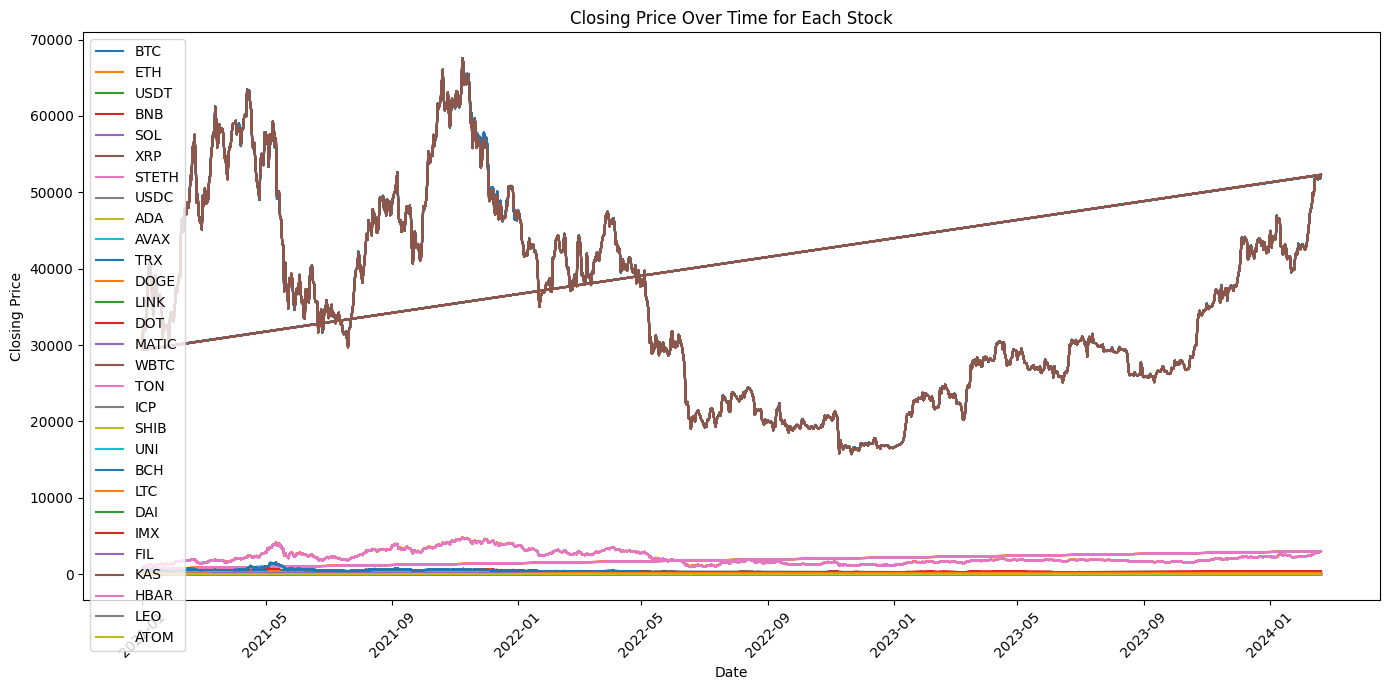

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot for each stock's closing price
plt.figure(figsize=(14, 7))
for stock in df['Symbol'].unique():
    subset = df[df['Symbol'] == stock]
    plt.plot(subset['date'], subset['Close'], label=stock)

plt.title('Closing Price Over Time for Each Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

#### Volume over the years 

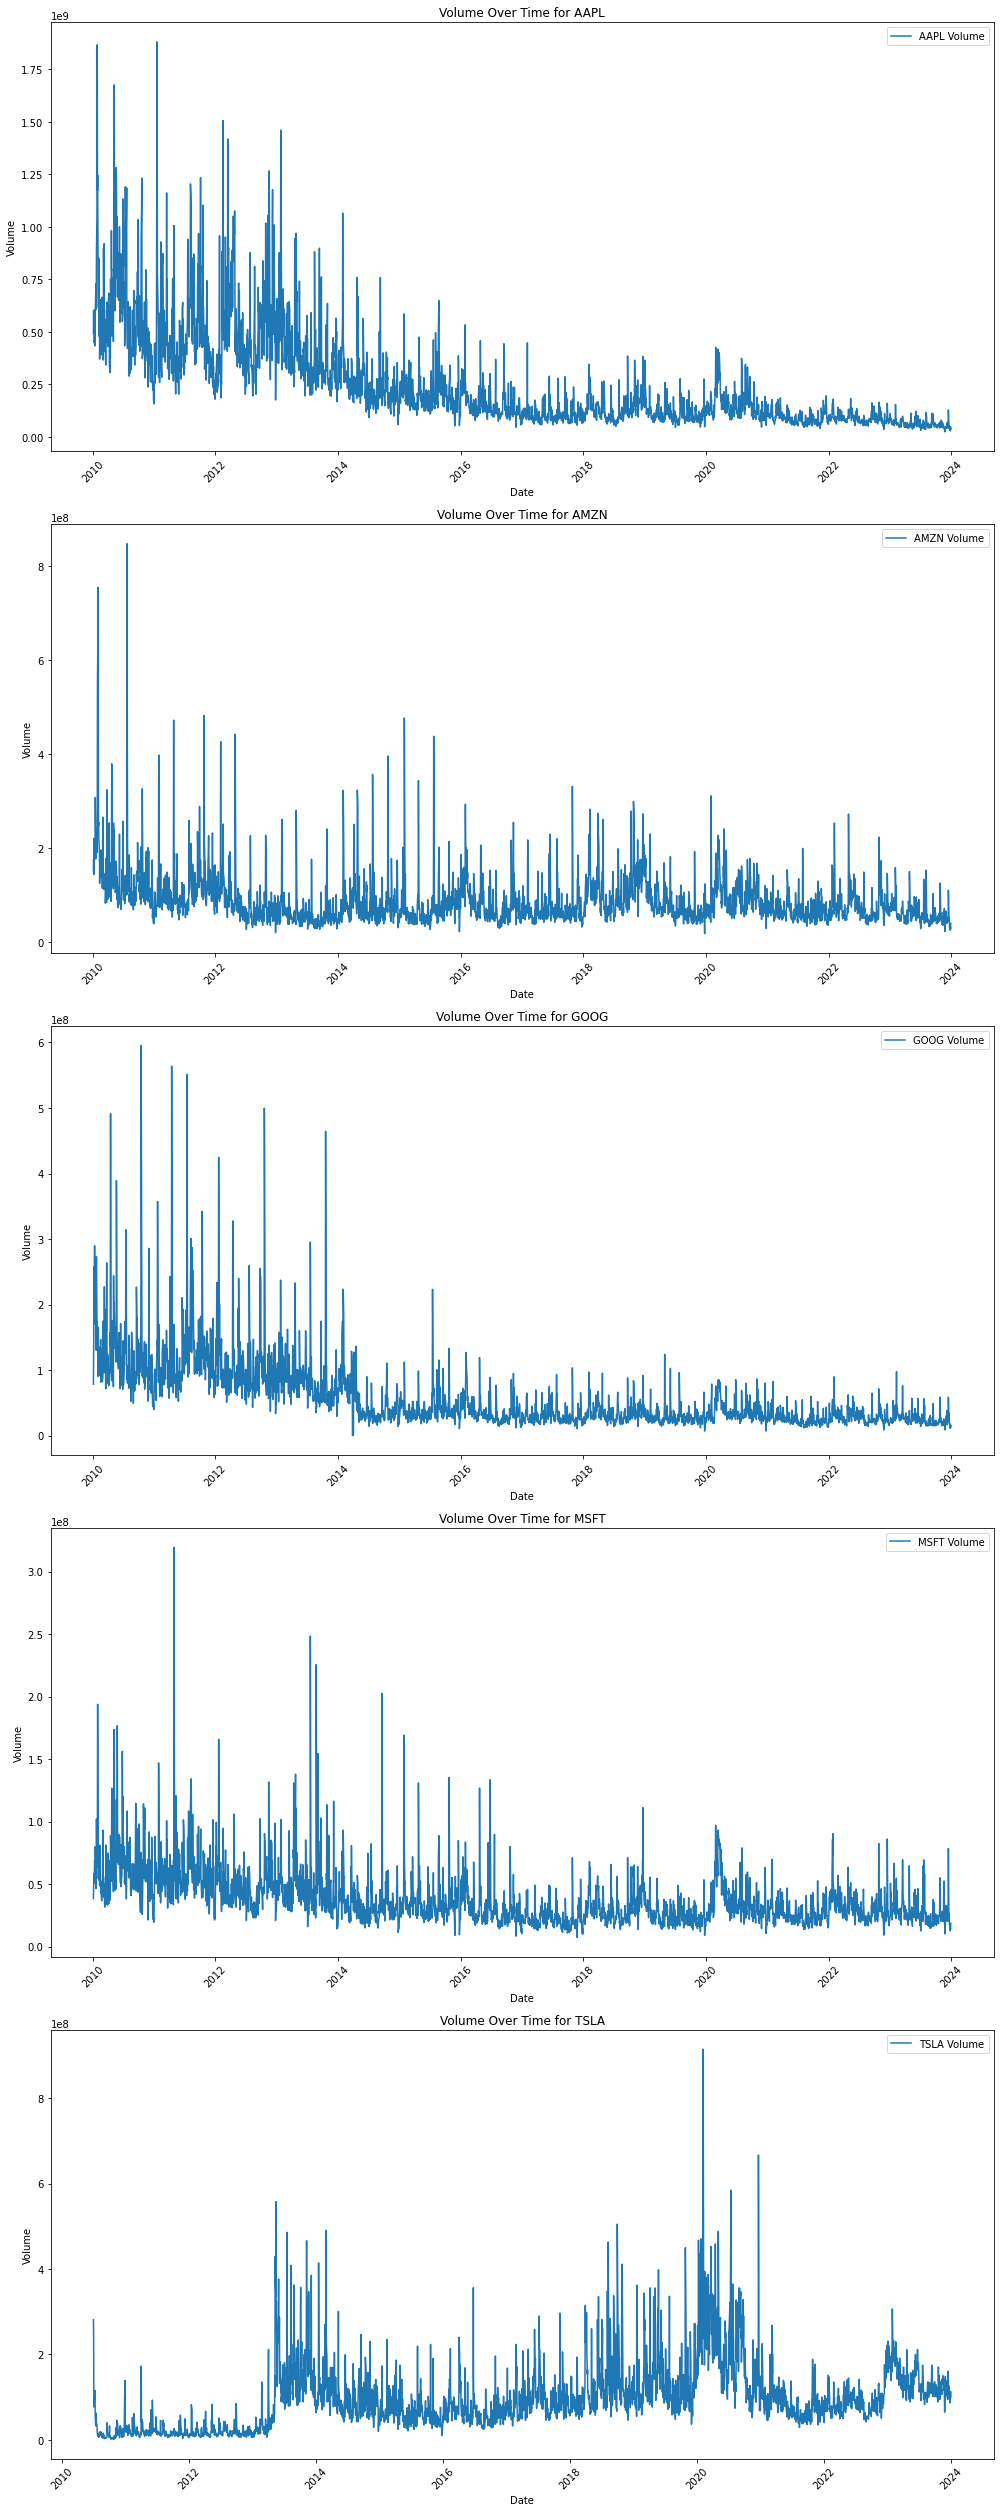

In [71]:
# Assuming df_stocks is your DataFrame and it has been properly formatted
unique_stocks = df_stocks['Stock'].unique()
n_stocks = len(unique_stocks)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_stocks, 1, figsize=(14, 7*n_stocks)) # Adjust the size as needed

for i, stock in enumerate(unique_stocks):
    subset = df_stocks[df_stocks['Stock'] == stock]
    ax = axes[i] if n_stocks > 1 else axes
    ax.plot(subset['Date'], subset['Volume'], label=f'{stock} Volume')
    ax.set_title(f'Volume Over Time for {stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

In [74]:
import pandas as pd
import numpy as np
corr = df_stocks[['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Open,Low,Close,Adjusted_Close,Volume
Open,1.000000,0.999679,0.999786,0.999465,-0.218471
Low,0.999679,1.000000,0.999803,0.999349,-0.222898
Close,0.999786,0.999803,1.000000,0.999611,-0.220610
Adjusted_Close,0.999465,0.999349,0.999611,1.000000,-0.220514
Volume,-0.218471,-0.222898,-0.220610,-0.220514,1.000000


Open, Low, Close, and Adjusted_Close prices are highly positively correlated with each other, simce because they are all measures of stock prices within the same trading day.

#### Moving Averages


##### 30-day

In [84]:
# Calculate 30-day Moving Averages for the Closing Prices of each stock
df_stocks['30_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=30).mean())

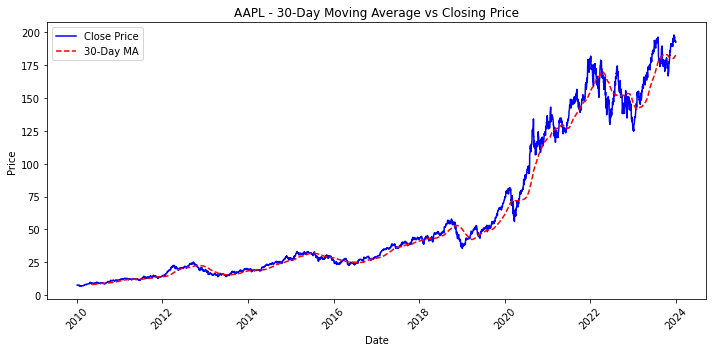

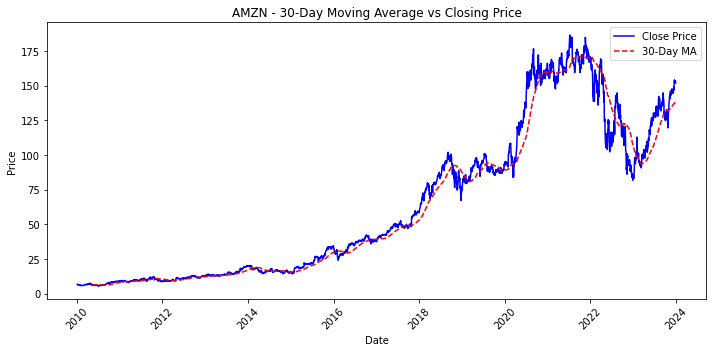

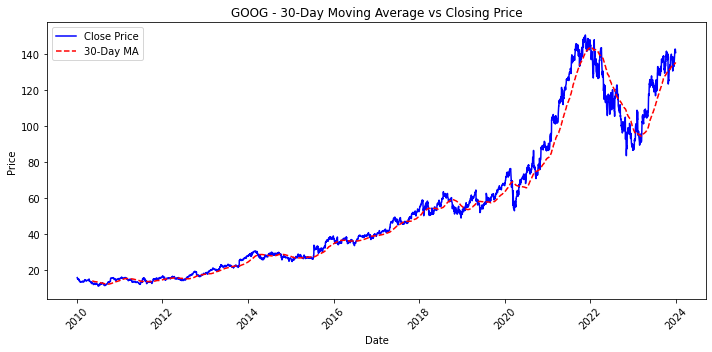

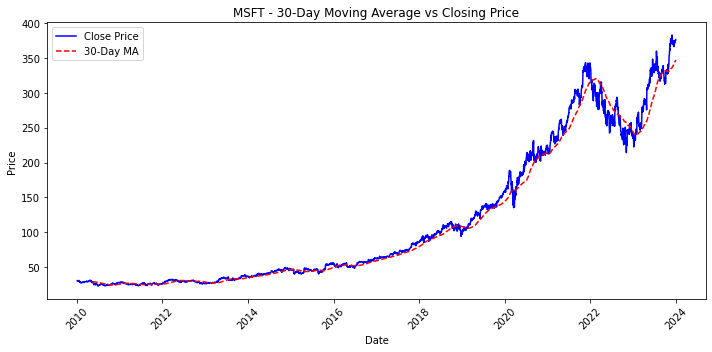

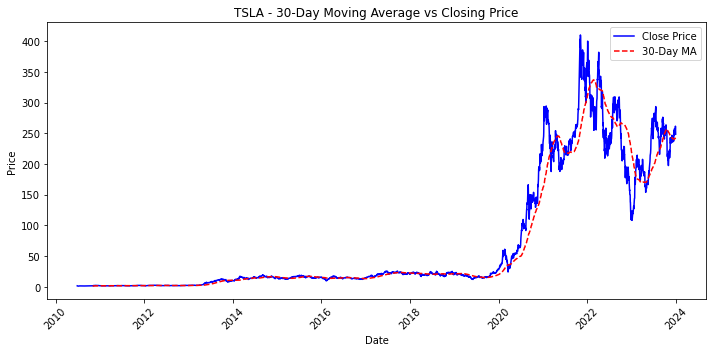

In [81]:
stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['30_day_MA'], label='30-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 30-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 60-day

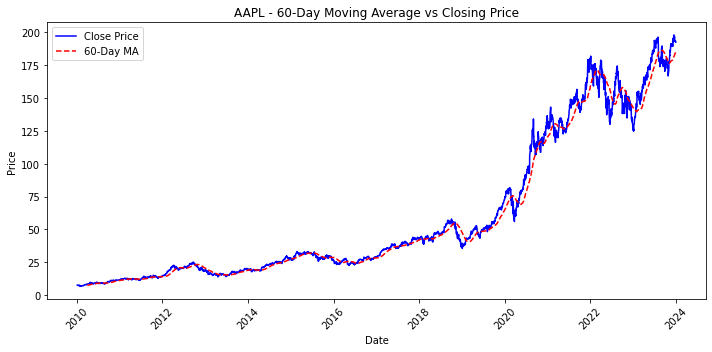

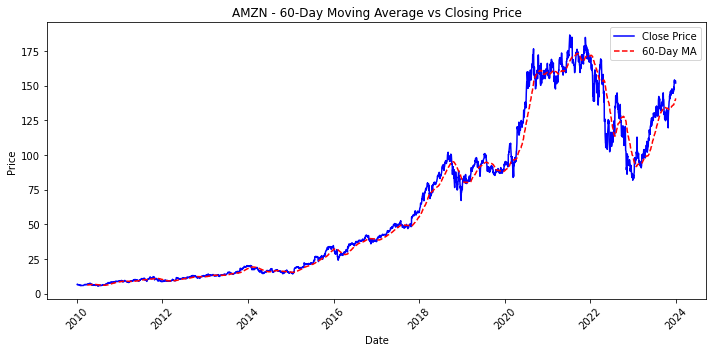

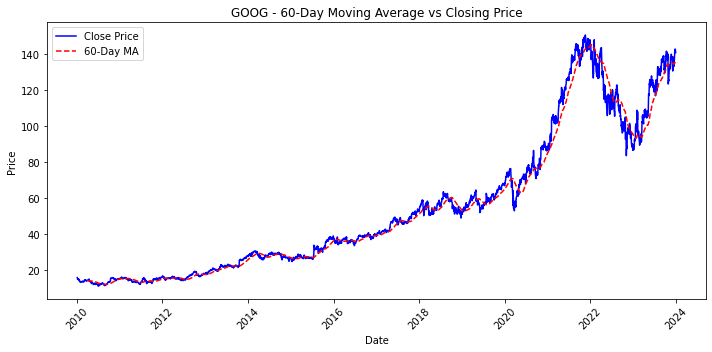

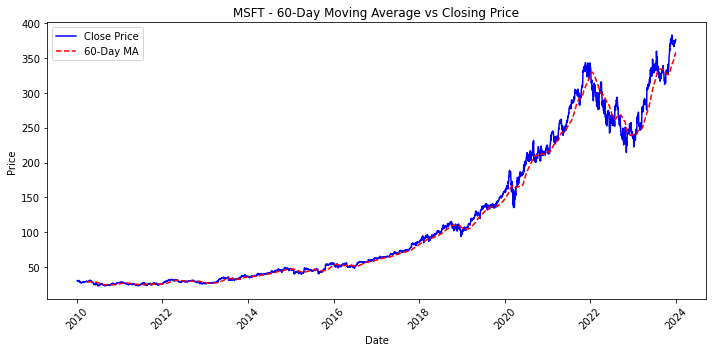

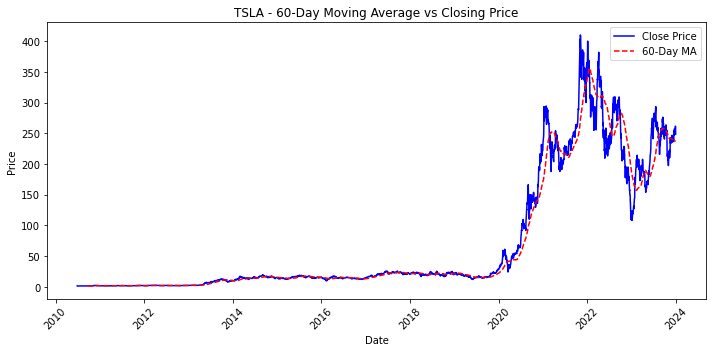

In [86]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['60_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=60).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 90-day

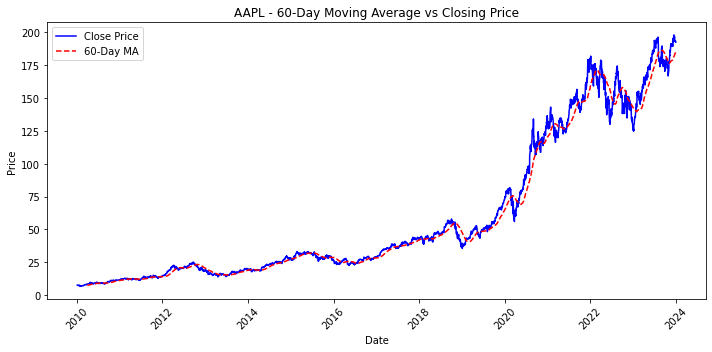

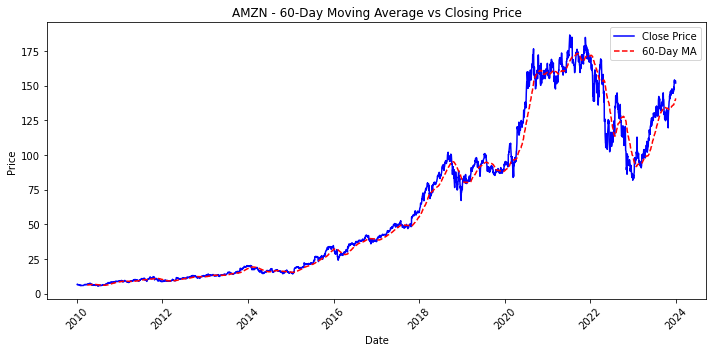

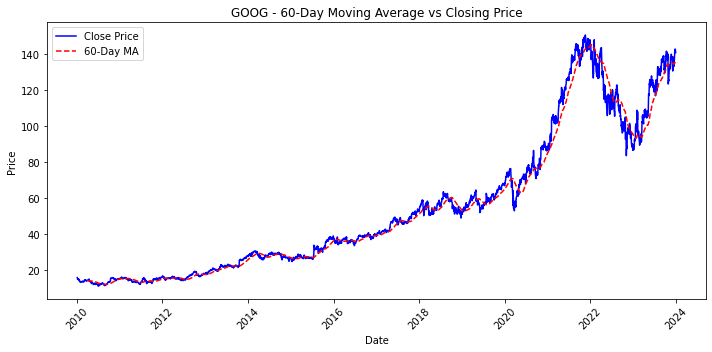

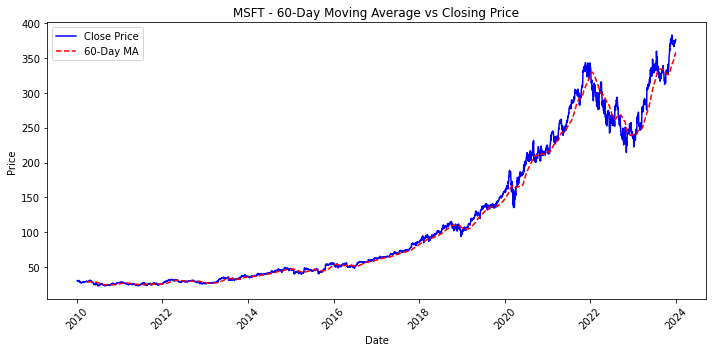

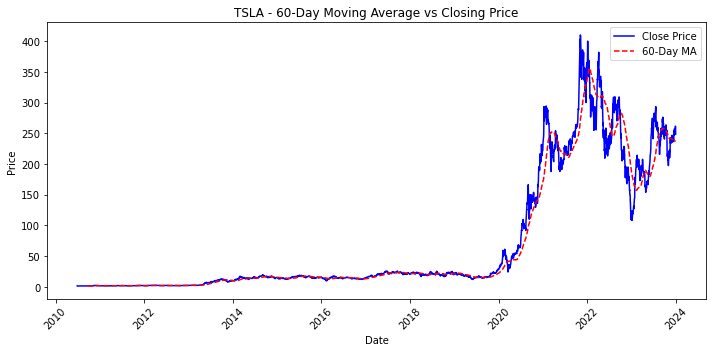

In [87]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['90_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=90).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [91]:
df_stocks.drop(['30_day_MA', '60_day_MA', '90_day_MA'], axis=1, inplace=True)


#### Seasonality Analysis

In [93]:
df_seasonality =  df_stocks

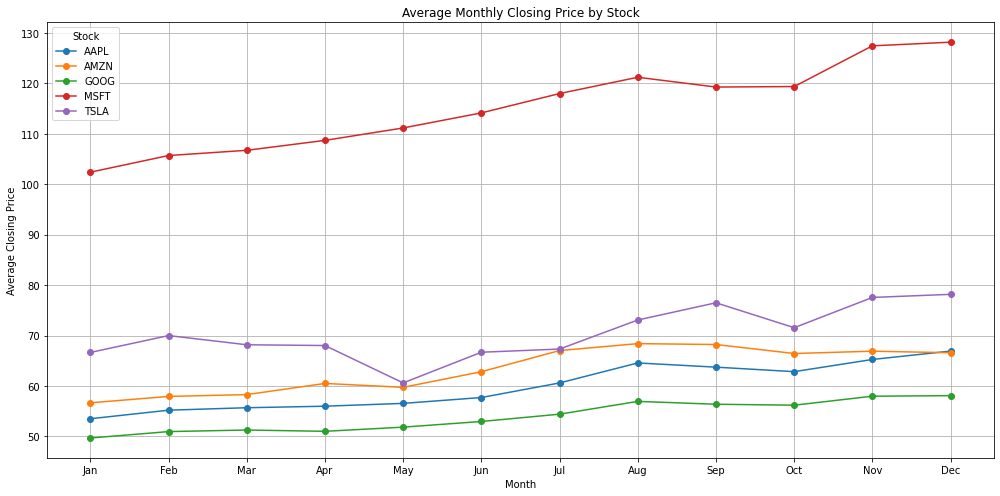

In [94]:
# Resample data to monthly and calculate average closing price for each stock
df_seasonality['Month'] = df_seasonality['Date'].dt.month
monthly_avg = df_seasonality.groupby(['Stock', 'Month'])['Close'].mean().unstack(level=0)

# Plot the monthly average closing price for each stock
monthly_avg.plot(figsize=(14, 7), marker='o')
plt.title('Average Monthly Closing Price by Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Stock')
plt.tight_layout()
plt.show()

#### Outliers

##### Box plot 

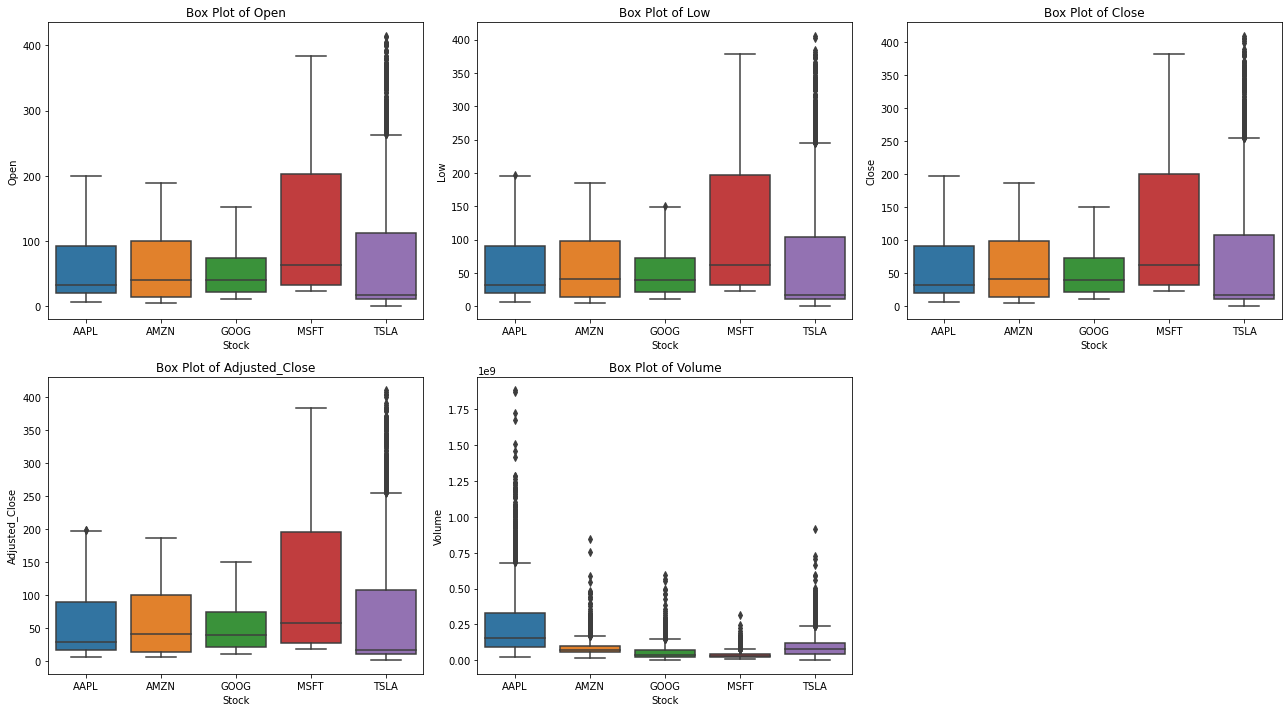

In [96]:
# Box Plots for Numerical Features to Identify Outliers

plt.figure(figsize=(18, 10))

# Creating a subplot for each numerical feature
for i, column in enumerate(['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Stock', y=column, data=df_stocks_pivoted)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Stock')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


##### Volatility- Daily Price changes 

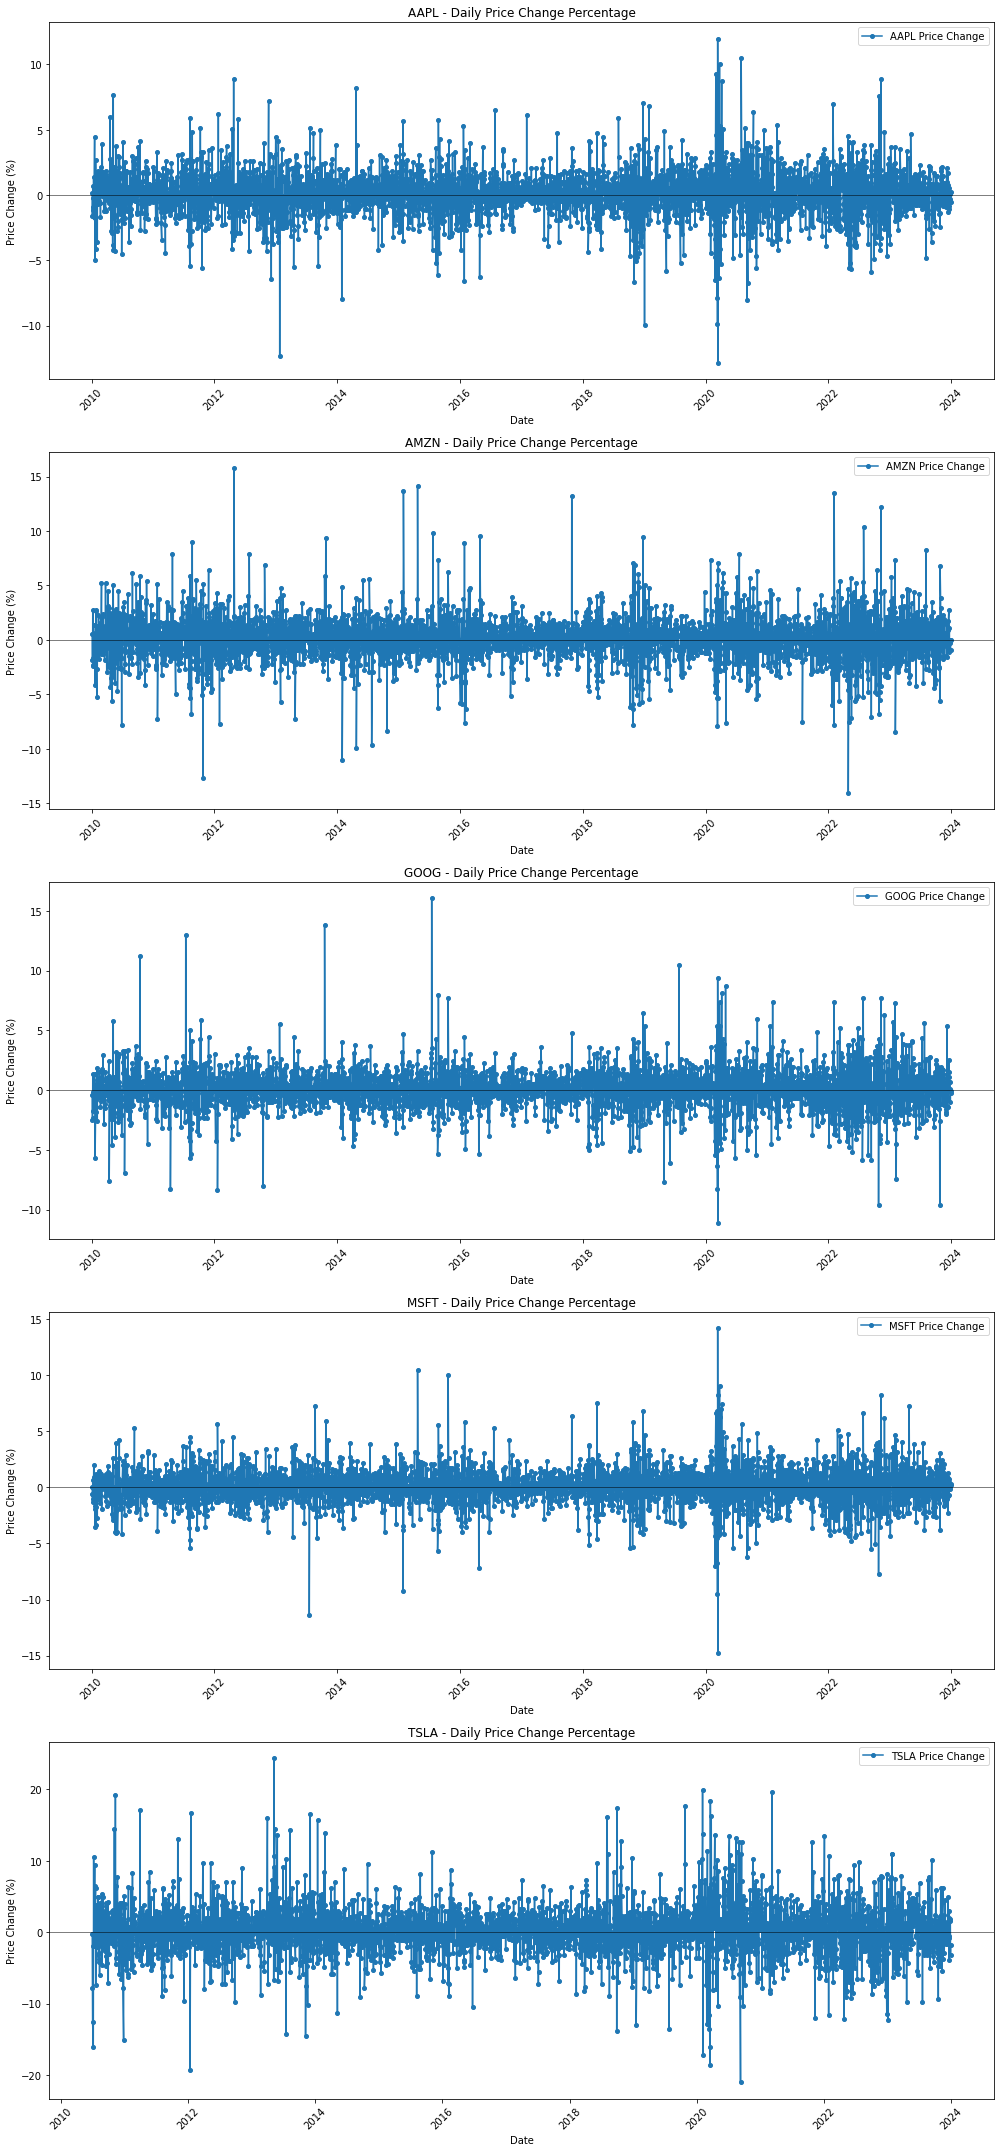

In [102]:
df_stocks_volatility = df_stocks

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2020 to the present

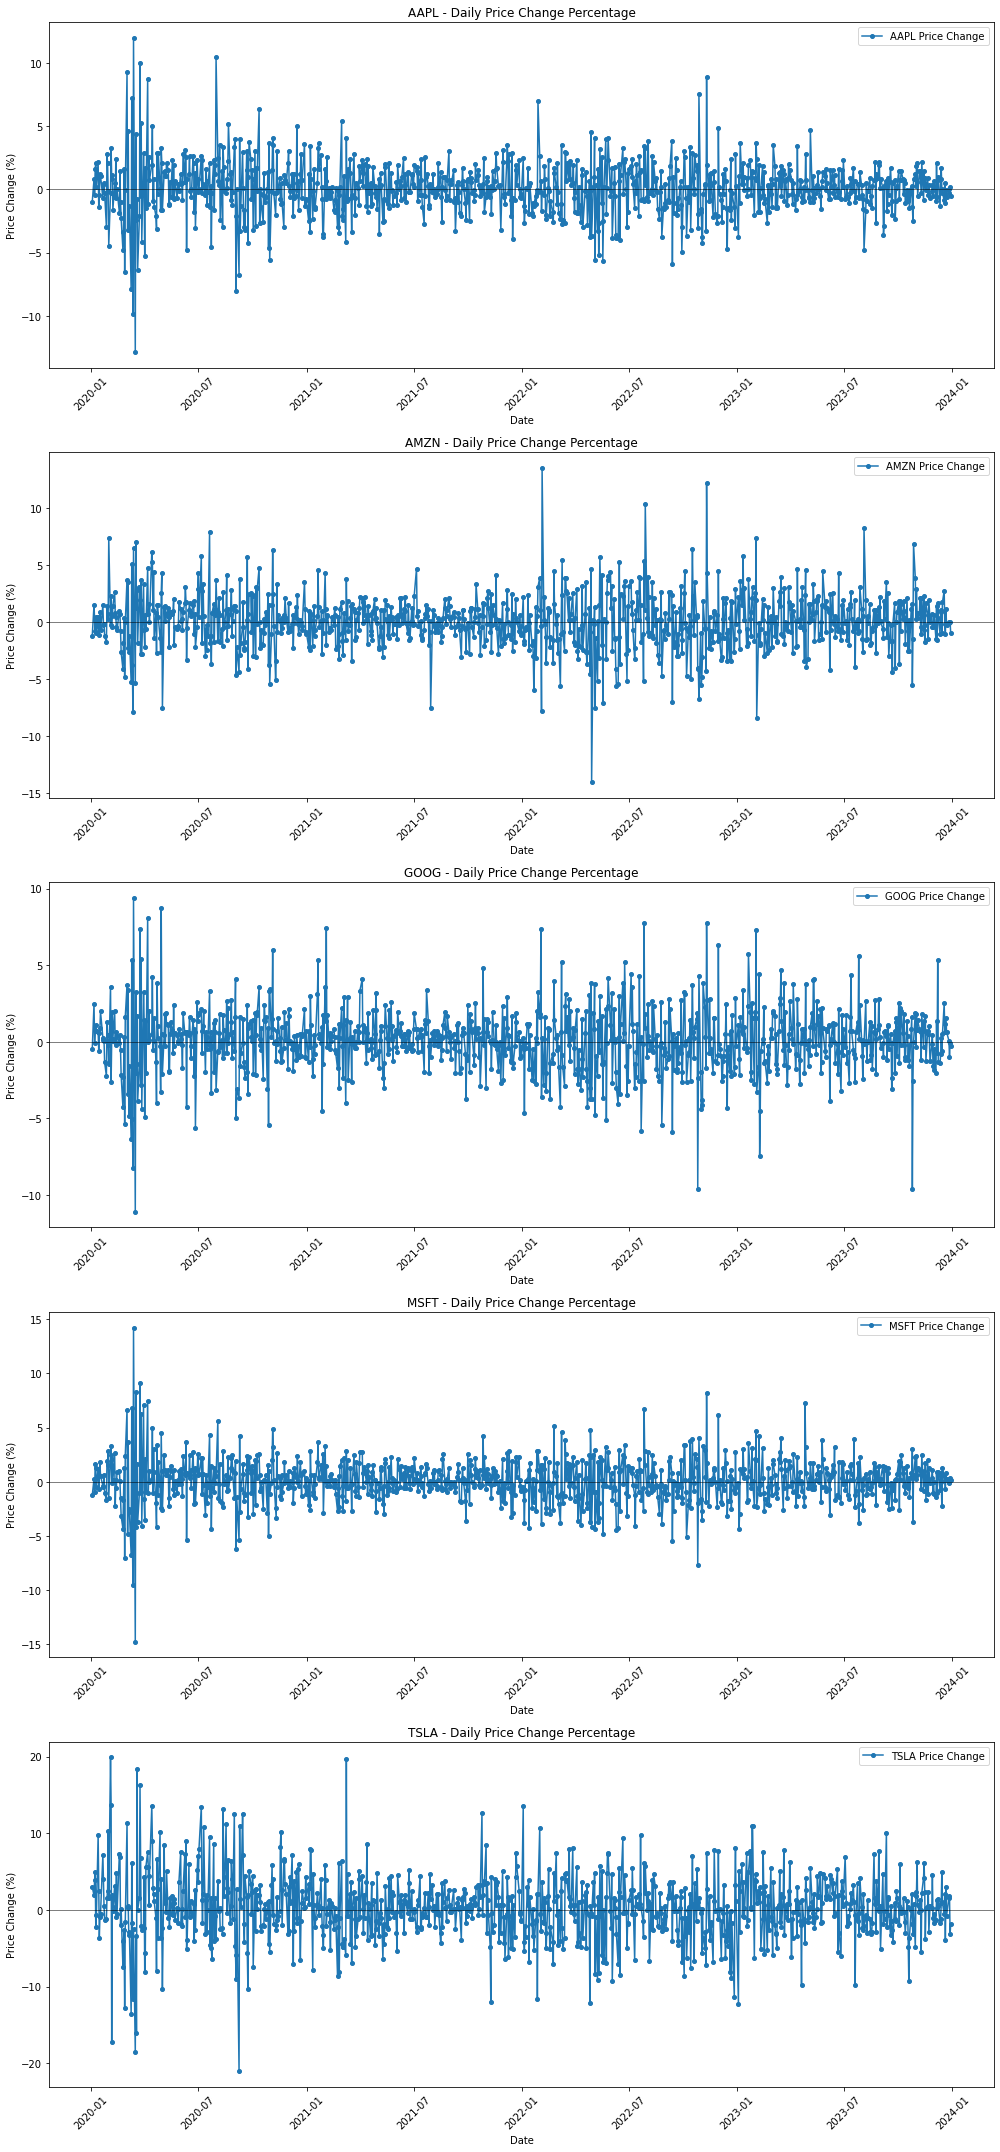

In [104]:
# Filtering for dates from 2020 to the present
df_stocks_volatility = df_stocks_volatility[df_stocks_volatility['Date'] >= '2020-01-01']

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Stock Performance Comparison

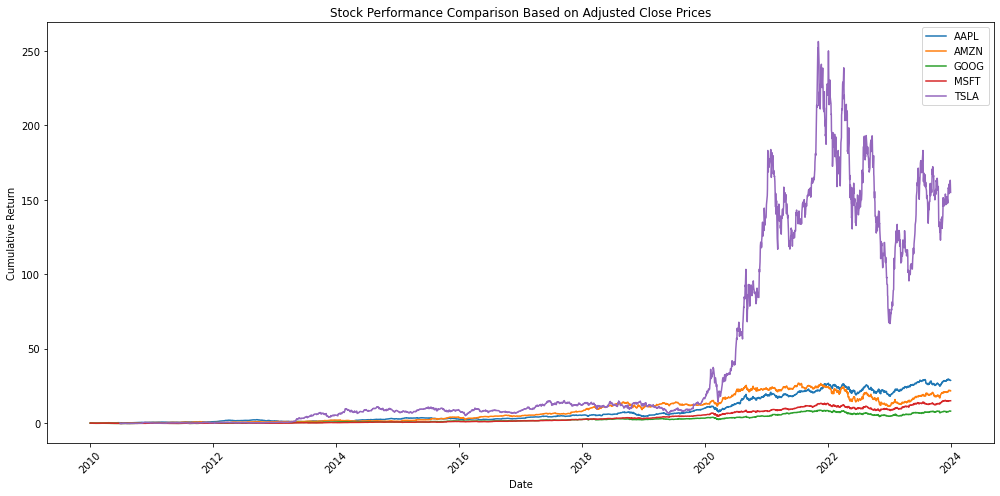

In [105]:
plt.figure(figsize=(14, 7))

# Calculate the percentage change in Adjusted Close price
df_stocks['Adjusted_Close_Change'] = df_stocks.groupby('Stock')['Adjusted_Close'].pct_change()

# Plot the cumulative product of percentage changes to compare performance over time
for stock in df_stocks['Stock'].unique():
    subset = df_stocks[df_stocks['Stock'] == stock]
    # Calculate cumulative return
    cumulative_return = (1 + subset['Adjusted_Close_Change']).cumprod() - 1
    plt.plot(subset['Date'], cumulative_return, label=stock)

plt.title('Stock Performance Comparison Based on Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Volume vs. Price Movements

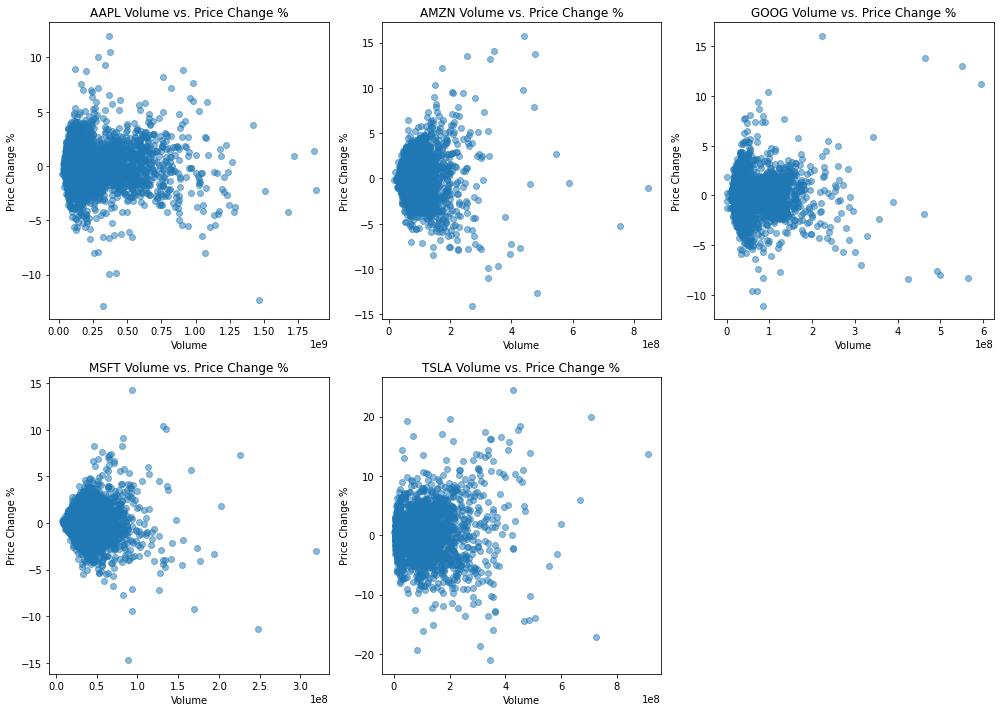

Stock
AAPL   -0.048865
AMZN   -0.002374
GOOG   -0.020670
MSFT   -0.070357
TSLA    0.081663
dtype: float64

In [114]:
# Calculate the day's price change percentage
df_stocks['Price_Change_Pct'] = df_stocks.groupby('Stock')['Close'].pct_change() * 100

# Scatter plot for each stock showing volume vs. price change percentage
plt.figure(figsize=(14, 10))

for i, stock in enumerate(df_stocks['Stock'].unique(), start=1):
    plt.subplot(2, 3, i)
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.scatter(subset['Volume'], subset['Price_Change_Pct'], alpha=0.5)
    plt.title(f'{stock} Volume vs. Price Change %')
    plt.xlabel('Volume')
    plt.ylabel('Price Change %')

plt.tight_layout()
plt.show()

# Pearson correlation coefficient between volume and price change percentage for each stock
correlation_df = df_stocks.groupby('Stock').apply(lambda x: x[['Volume', 'Price_Change_Pct']].corr().iloc[0, 1])

correlation_df


In [118]:
df_stocks.to_csv('data/stocks/df_stocks.csv')

In [119]:
df_stocks

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,2010-01-04,AAPL,7.660714,7.585000,7.643214,6.479000,493729600.0,1,NaN,NaN
1,2010-01-04,AMZN,6.830500,6.657000,6.695000,6.695000,151998000.0,1,NaN,NaN
2,2010-01-04,GOOG,15.678981,15.547723,15.610239,15.610239,78541293.0,1,NaN,NaN
3,2010-01-04,MSFT,31.100000,30.590000,30.950001,23.474924,38409100.0,1,NaN,NaN
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
...,...,...,...,...,...,...,...,...,...,...
17483,2023-12-29,AAPL,194.399994,191.729996,192.529999,192.529999,42628800.0,12,-0.542413,-0.005424
17484,2023-12-29,AMZN,153.889999,151.029999,151.940002,151.940002,39789000.0,12,-0.938846,-0.009388
17485,2023-12-29,GOOG,141.434998,139.899994,140.929993,140.929993,14872700.0,12,-0.247739,-0.002477
17486,2023-12-29,MSFT,377.160004,373.480011,376.040009,376.040009,18723000.0,12,0.202518,0.002025
